# Lead case study

# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Data Preparation

In [2]:
data = pd.DataFrame(pd.read_csv('E:\dsfw\Leads.csv'))
data.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [4]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [36]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [6]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [7]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [28]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                           0.00
Do Not Email                                          0.00
Do Not Call                                           0.00
Converted                                             0.00
TotalVisits                                           1.48
                                                      ... 
Last Notable Activity_Resubscribed to emails          0.00
Last Notable Activity_SMS Sent                        0.00
Last Notable Activity_Unreachable                     0.00
Last Notable Activity_Unsubscribed                    0.00
Last Notable Activity_View in browser link Clicked    0.00
Length: 126, dtype: float64

In [8]:
# we will drop the columns having more than 70% NA values.
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, 1)

In [9]:
data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

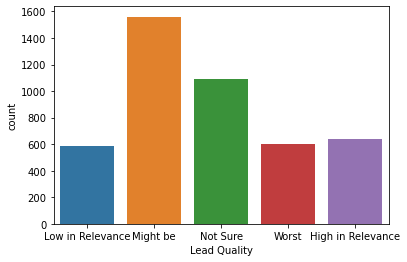

In [10]:
sns.countplot(data['Lead Quality'])

In [41]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

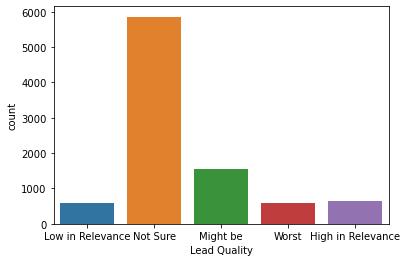

In [20]:
sns.countplot(data['Lead Quality'])

In [11]:
## An index and score assigned to each customer based on their activity and their profile

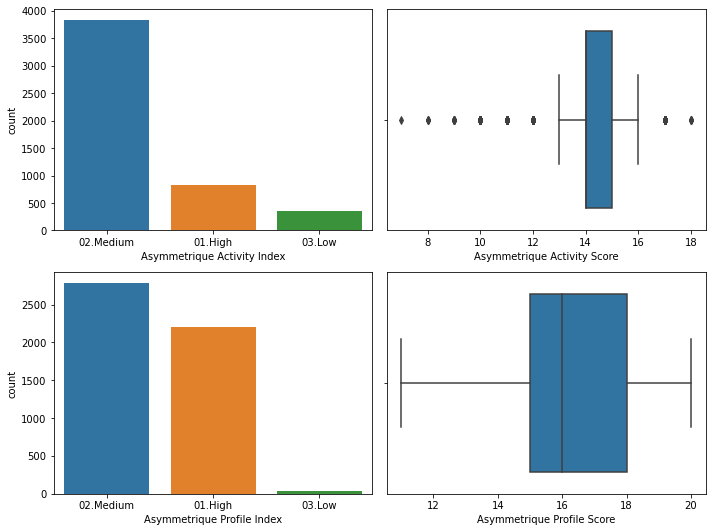

In [12]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [13]:
# There is too much variation in thes parameters so its not reliable to impute any value in it. 
# 45% null values means we need to drop these columns.

In [14]:
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [15]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
# City

In [17]:
data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

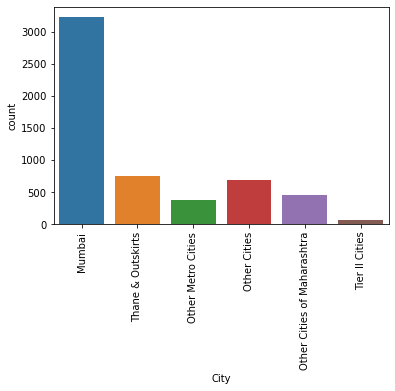

In [18]:
sns.countplot(data.City)
xticks(rotation = 90)

In [19]:
# Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.

In [20]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [21]:
data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

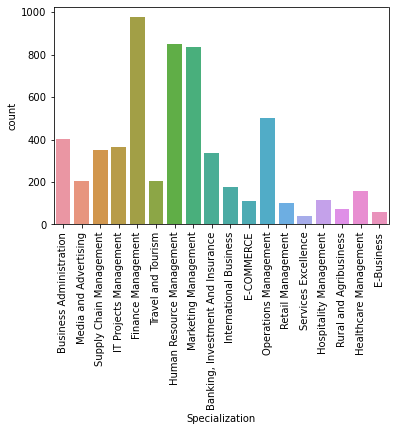

In [22]:
sns.countplot(data.Specialization)
xticks(rotation = 90)

In [23]:
# It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values. 

In [24]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [25]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
# Tags

In [27]:
data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

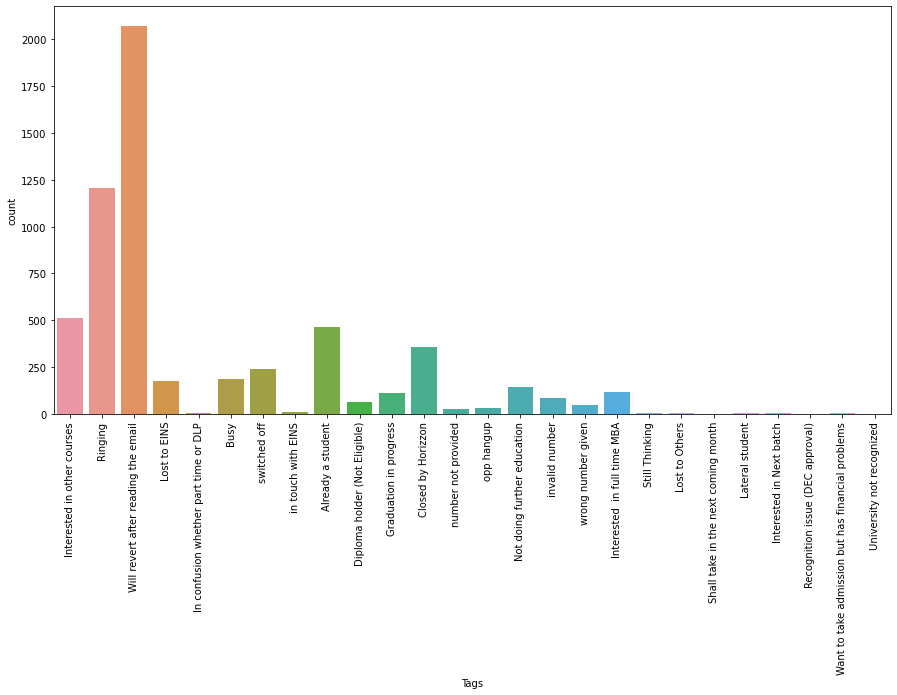

In [28]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)
xticks(rotation = 90)

In [29]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email

In [30]:
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [31]:
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [32]:
# Blanks in the this column may be imputed by 'Better Career Prospects

In [33]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# Occupation

In [34]:
data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [50]:
# 86% entries are of Unemployed so we can impute "Unemployed" in it

In [35]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

# Country

In [36]:
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [37]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [38]:
# Rest missing values are under 2% so we can drop these rows.
data.dropna(inplace = True)

In [39]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [40]:
data.to_csv('Leads_cleaned')

In [59]:
## Now Data is clean and we can start with the analysis part


# Exploratory Data Analytics

In [41]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [42]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

56.06338998621957

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

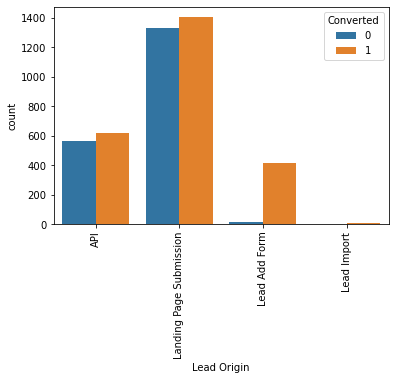

In [43]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)


API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than 90% conversion rate but count of lead are not very high.
Lead Import are very less in count.
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

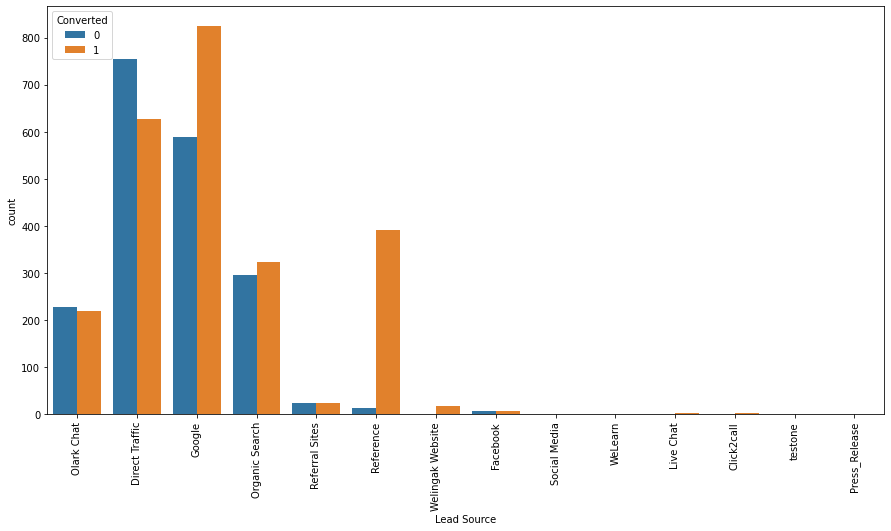

In [44]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

In [45]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

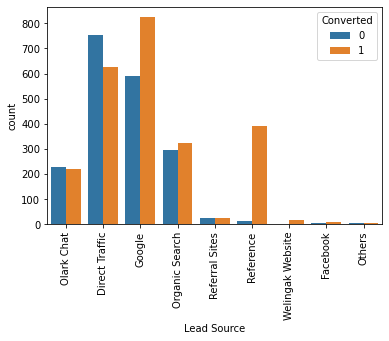

In [46]:
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)


Google and Direct traffic generates maximum number of leads.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.



# Do Not Email & Do Not Call

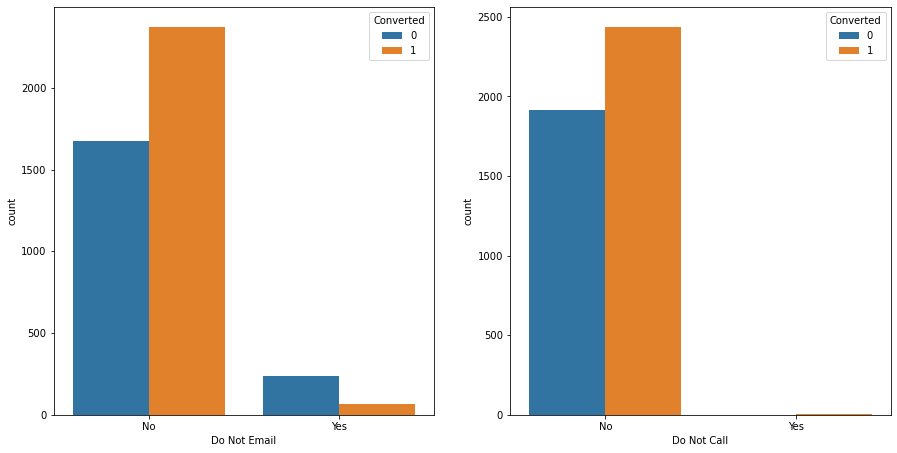

In [47]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

# Total Visits

In [48]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    4354.000000
mean        3.808682
std         5.294923
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       251.000000
Name: TotalVisits, dtype: float64

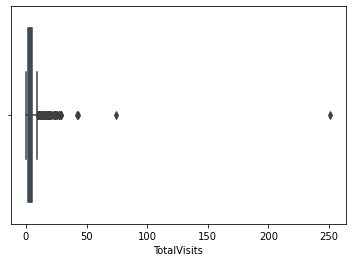

In [49]:
sns.boxplot(data['TotalVisits'])

In [50]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [51]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

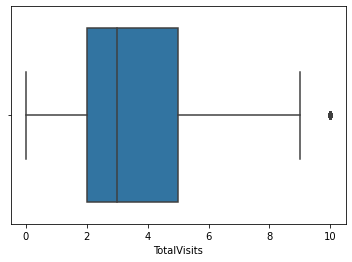

In [52]:
sns.boxplot(data['TotalVisits'])

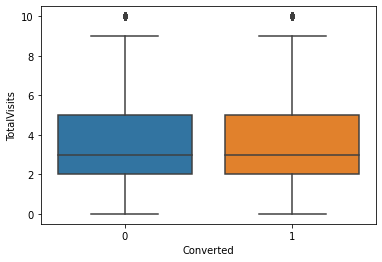

In [53]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

# Inference
Median for converted and not converted leads are the same.
Nothng conclusive can be said on the basis of Total Visits.

# Total time spent on website

In [54]:
data['Total Time Spent on Website'].describe()

count    4354.000000
mean      594.821314
std       579.054824
min         0.000000
25%        66.000000
50%       351.000000
75%      1102.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

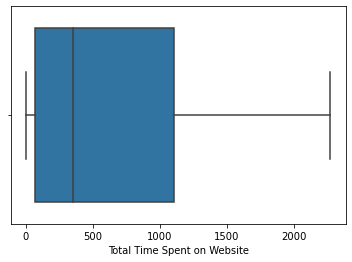

In [55]:
sns.boxplot(data['Total Time Spent on Website'])

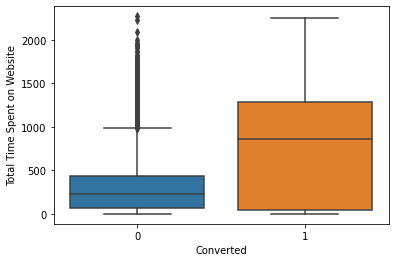

In [56]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

# Inference
 Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

# Page views per visit

In [57]:
data['Page Views Per Visit'].describe()

count    4354.000000
mean        2.610923
std         2.079434
min         0.000000
25%         1.330000
50%         2.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

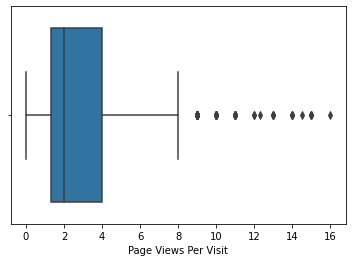

In [58]:
sns.boxplot(data['Page Views Per Visit'])

In [59]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [60]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

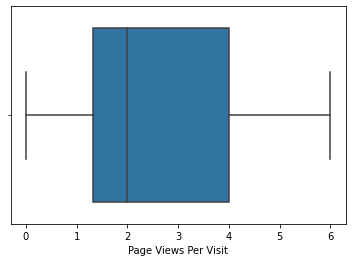

In [61]:
sns.boxplot(data['Page Views Per Visit'])

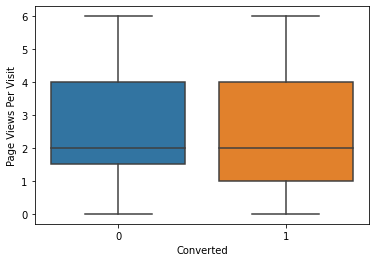

In [62]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

# Last Activity

In [63]:
data['Last Activity'].describe()

count         4354
unique          16
top       SMS Sent
freq          1704
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

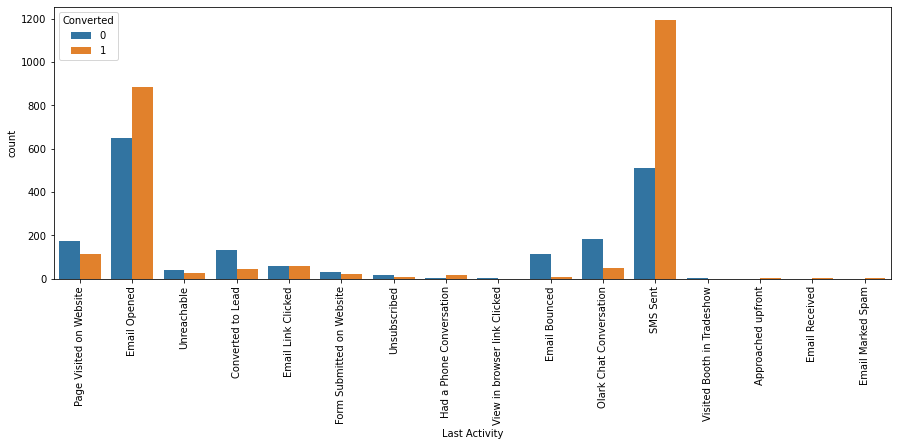

In [64]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [65]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

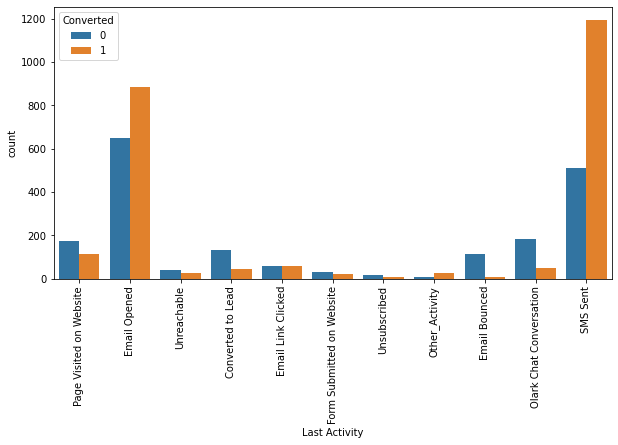

In [66]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.b

# country

In [67]:
data.Country.describe()

count      4354
unique       28
top       India
freq       4213
Name: Country, dtype: object

# Specialization

In [68]:
data.Specialization.describe()

count       4354
unique        19
top       Others
freq         823
Name: Specialization, dtype: object

In [69]:
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

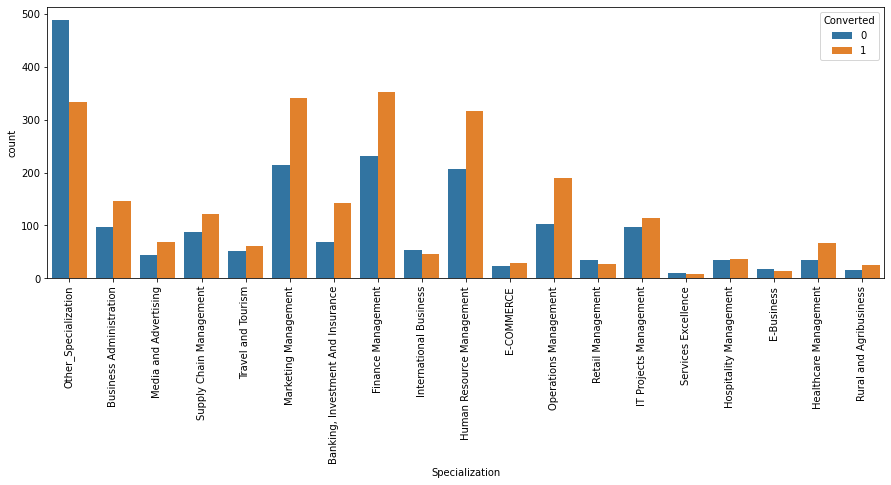

In [70]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = data)
xticks(rotation = 90)

Focus should be more on the Specialization with high conversion rate.


# Occupation

In [71]:
data['What is your current occupation'].describe()

count           4354
unique             6
top       Unemployed
freq            3483
Name: What is your current occupation, dtype: object

In [72]:
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

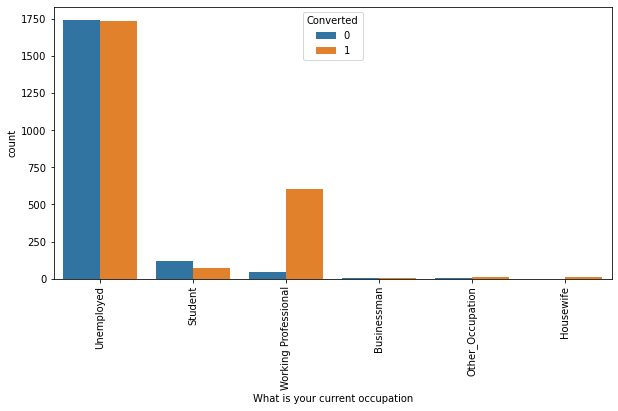

In [73]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
xticks(rotation = 90)

# What matters most to you in choosing a course

In [74]:
data['What matters most to you in choosing a course'].describe()


count                        4354
unique                          3
top       Better Career Prospects
freq                         4352
Name: What matters most to you in choosing a course, dtype: object

Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

# Search

In [75]:
data.Search.describe()

count     4354
unique       2
top         No
freq      4347
Name: Search, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

# X Education Forums

In [76]:
data['X Education Forums'].describe()

count     4354
unique       1
top         No
freq      4354
Name: X Education Forums, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

# Newspaper

In [77]:
data['Newspaper'].describe()

count     4354
unique       2
top         No
freq      4353
Name: Newspaper, dtype: object

# Digital Advertisement

In [78]:
data['Digital Advertisement'].describe()

count     4354
unique       2
top         No
freq      4352
Name: Digital Advertisement, dtype: object

# Through Recommendations

In [79]:
data['Through Recommendations'].describe()

count     4354
unique       2
top         No
freq      4348
Name: Through Recommendations, dtype: object

# Receive More Updates About Our Courses

In [80]:
data['Receive More Updates About Our Courses'].describe()

count     4354
unique       1
top         No
freq      4354
Name: Receive More Updates About Our Courses, dtype: object

# Tags

In [81]:
data.Tags.describe()

count                                    4354
unique                                     25
top       Will revert after reading the email
freq                                     2006
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

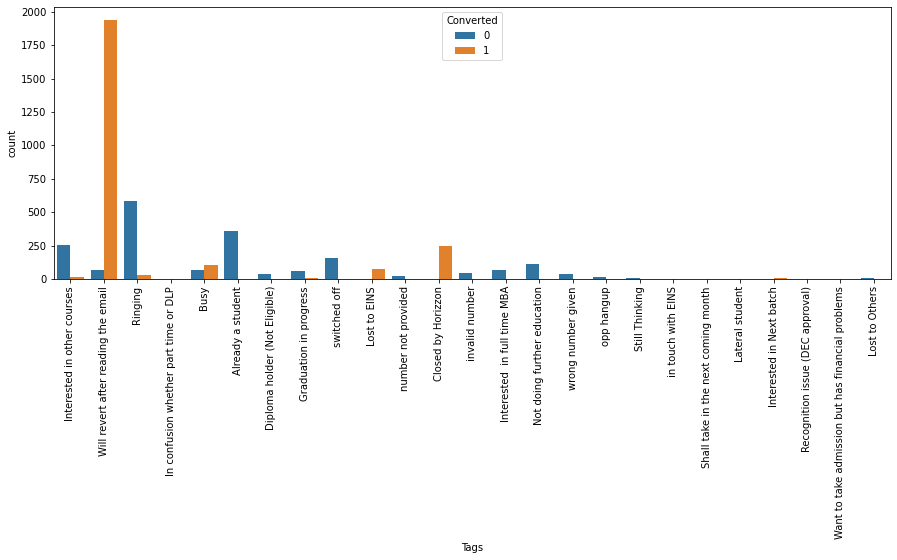

In [82]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

In [83]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

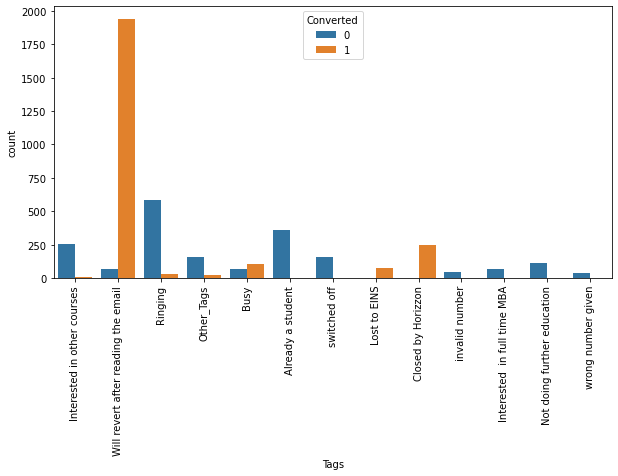

In [84]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

# Lead Quality

In [85]:
data['Lead Quality'].describe()

count         4354
unique           5
top       Might be
freq          1519
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

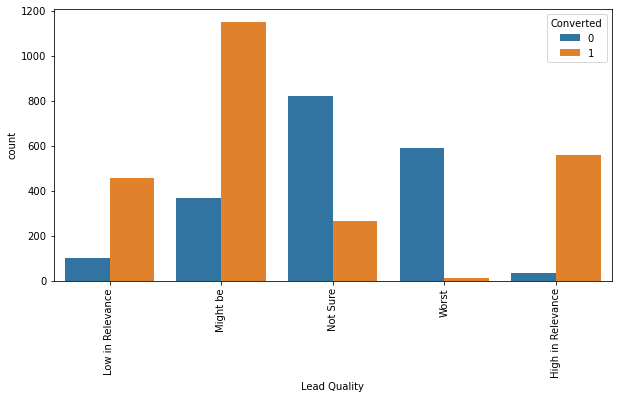

In [86]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)

# Update me on Supply Chain Content

In [87]:
data['Update me on Supply Chain Content'].describe()

count     4354
unique       1
top         No
freq      4354
Name: Update me on Supply Chain Content, dtype: object

# Get updates on DM Content

In [88]:
data['Get updates on DM Content'].describe()

count     4354
unique       1
top         No
freq      4354
Name: Get updates on DM Content, dtype: object

In [89]:
data['I agree to pay the amount through cheque'].describe()

count     4354
unique       1
top         No
freq      4354
Name: I agree to pay the amount through cheque, dtype: object

In [90]:
data['A free copy of Mastering The Interview'].describe()

count     4354
unique       2
top         No
freq      2735
Name: A free copy of Mastering The Interview, dtype: object

# City

In [91]:
data.City.describe()

count       4354
unique         6
top       Mumbai
freq        2993
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

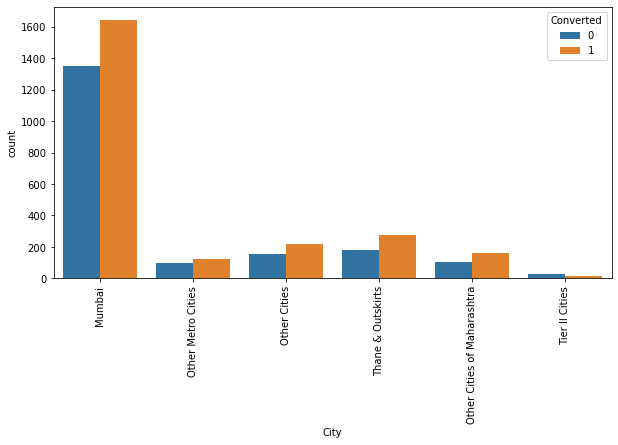

In [92]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = data)
xticks(rotation = 90)

# Last Notable Activity

In [93]:
data['Last Notable Activity'].describe()

count         4354
unique          14
top       SMS Sent
freq          1453
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

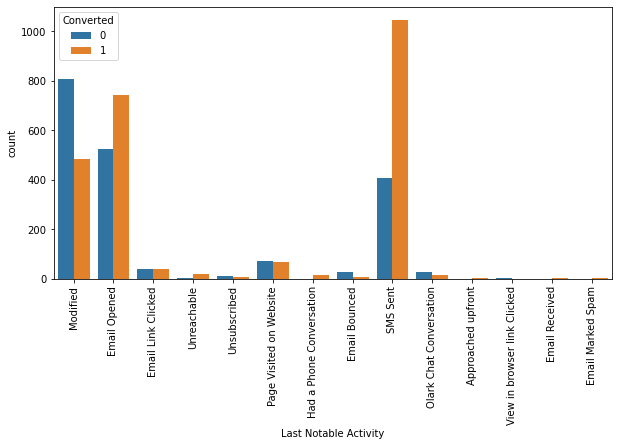

In [94]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

# Results

Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis

In [95]:
 data= data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [96]:
data.shape

(4354, 16)

In [97]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,Modified


In [98]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [99]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [100]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [101]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [102]:
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,0,1,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [103]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)

In [104]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [105]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [106]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4584,0,0,0.888005,0.612028,0.290907,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5617,0,0,-1.272851,-1.029308,-1.425005,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1095,0,0,-0.552566,-0.101970,-0.281063,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3166,0,0,-0.192423,-0.523487,0.290907,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
401,0,0,0.527863,0.866659,1.434849,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [108]:
# Checking the Churn Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

56.06338998621957

# Model Building

In [109]:
import statsmodels.api as sm

In [110]:
# Logistic regression model
logm1 = sm.GLM(y_train.astype(float),(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     2964
Model Family:                Binomial   Df Model:                           82
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -384.03
Date:                Tue, 12 May 2020   Deviance:                       768.06
Time:                        08:57:07   Pearson chi2:                 2.50e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   17.3425   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                            -0.9541      0.592     -1.613      0.107      -2.114       0.205
Do Not Call                                           2.364e-09   1.24e-05      0.000      1.000   -2.42e-05    2.42e-05
TotalVisits                                              0.4143      0.172      2.411      0.016       0.078       0.751
Total Time Spent on Website                              0.9865      0.117      8.414      0.000       0.757       1.216
Page Views Per Visit                                    -0.3792      0.181     -2.098      0.036      -0.734      -0.025
Lead Origin_Landing Page Submission                      0.5456      0.394      1.386      0.166      -0.226       1.317
Lead Origin_Lead Add Form                                0.5512      2.541      0.217      0.828      -4.429       5.532
Lead Origin_Lead Import                                 27.0528   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                   -24.8276   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.4205      0.269      1.560      0.119      -0.108       0.949
Lead Source_Olark Chat                                   1.7029      0.496      3.431      0.001       0.730       2.676
Lead Source_Organic Search                               0.7154      0.367      1.952      0.051      -0.003       1.434
Lead Source_Others                                       1.6732      2.361      0.709      0.479      -2.955       6.301
Lead Source_Reference                                    1.8855      2.591      0.728      0.467      -3.193       6.964
Lead Source_Referral Sites                               1.2199      0.819      1.490      0.136      -0.385       2.825
Lead Source_Welingak Website                            21.9482   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Last Activity_Email Bounced                             -1.3003      1.276     -1.019      0.308      -3.802       1.201
Last Activity_Email Link Clicked                        -1.4290      1.134     -1.260      0.208      -3.652       0.794
Last Activity_Email Opened                              -1.6409      0.704     -2.331      0.020      -3.020      -0.261
Last Activity_Form Submitted on Website                 -0.7501      0.923     -0.813      0.416      -2.559       1.059
Last Activity_Olark Chat Conversation                   -0.9130      0.760     -1.201      0.230      -2.402       0.576
Last Activity_Other_Activity                            -2

# Feature Selection Using RFE

In [111]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train.astype(float), y_train.astype(float))

In [112]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 69),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', False, 46),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', False, 44),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Welingak Website', False, 22),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Form Submitted on Website', False, 48),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Other_Activity', False, 63),
 ('Last Activity_Page Visited on Website', False, 32),
 ('Last Activity_SMS Sent',

In [114]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [115]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Manag

In [116]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3031
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -430.53
Date:                Tue, 12 May 2020   Deviance:                       861.06
Time:                        08:58:30   Pearson chi2:                 2.87e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.7965      0.238    -11.774      0.000      -3.262      -2.331
Do Not Email                                      -0.7766      0.472     -1.645      0.100      -1.702       0.148
Total Time Spent on Website                        0.9288      0.107      8.653      0.000       0.718       1.139
Lead Origin_Lead Add Form                          2.2755      1.741      1.307      0.191      -1.138       5.689
Lead Source_Olark Chat                             1.0894      0.335      3.253      0.001       0.433       1.746
Lead Source_Reference                             -0.0206      1.818     -0.011      0.991      -3.584       3.542
Last Activity_SMS Sent                             1.3252      0.212      6.252      0.000       0.910       1.741
Tags_Busy                                          2.2395      0.310      7.229      0.000       1.632       2.847
Tags_Closed by Horizzon                            7.3219      1.035      7.077      0.000       5.294       9.350
Tags_Lost to EINS                                  6.9987      1.102      6.349      0.000       4.838       9.159
Tags_Ringing                                      -1.3776      0.343     -4.020      0.000      -2.049      -0.706
Tags_Will revert after reading the email           5.2207      0.262     19.957      0.000       4.708       5.733
Tags_switched off                                 -1.7061      0.638     -2.676      0.007      -2.956      -0.456
Tags_wrong number given                          -21.1873    1.5e+04     -0.001      0.999   -2.95e+04    2.94e+04
Lead Quality_Worst                                -2.6317      0.653     -4.028      0.000      -3.912      -1.351
Last Notable Activity_Had a Phone Conversation    24.2845   2.13e+04      0.001      0.999   -4.17e+04    4.17e+04
==================================================================================================================
"""

In [124]:
col1 = col.drop('Lead Source_Reference',1)

In [125]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [126]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3032
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -430.53
Date:                Tue, 12 May 2020   Deviance:                       861.06
Time:                        09:17:30   Pearson chi2:                 2.87e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.7964      0.237    -11.780      0.000      -3.262      -2.331
Do Not Email                                      -0.7766      0.472     -1.646      0.100      -1.702       0.148
Total Time Spent on Website                        0.9288      0.107      8.653      0.000       0.718       1.139
Lead Origin_Lead Add Form                          2.2568      0.554      4.071      0.000       1.170       3.343
Lead Source_Olark Chat                             1.0893      0.335      3.253      0.001       0.433       1.746
Last Activity_SMS Sent                             1.3251      0.212      6.254      0.000       0.910       1.740
Tags_Busy                                          2.2395      0.310      7.229      0.000       1.632       2.847
Tags_Closed by Horizzon                            7.3216      1.034      7.079      0.000       5.294       9.349
Tags_Lost to EINS                                  6.9986      1.102      6.349      0.000       4.838       9.159
Tags_Ringing                                      -1.3776      0.343     -4.021      0.000      -2.049      -0.706
Tags_Will revert after reading the email           5.2206      0.262     19.964      0.000       4.708       5.733
Tags_switched off                                 -1.7061      0.638     -2.676      0.007      -2.956      -0.457
Tags_wrong number given                          -21.1874    1.5e+04     -0.001      0.999   -2.95e+04    2.94e+04
Lead Quality_Worst                                -2.6317      0.653     -4.028      0.000      -3.912      -1.351
Last Notable Activity_Had a Phone Conversation    24.2844   2.13e+04      0.001      0.999   -4.17e+04    4.17e+04
==================================================================================================================
"""

In [127]:
col2 = col1.drop('Tags_wrong number given',1)

In [128]:
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [129]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3033
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -432.76
Date:                Tue, 12 May 2020   Deviance:                       865.51
Time:                        09:18:21   Pearson chi2:                 2.87e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.8782      0.237    -12.124      0.000      -3.344      -2.413
Do Not Email                                      -0.8255      0.463     -1.784      0.074      -1.732       0.081
Total Time Spent on Website                        0.9302      0.107      8.682      0.000       0.720       1.140
Lead Origin_Lead Add Form                          2.2873      0.560      4.088      0.000       1.191       3.384
Lead Source_Olark Chat                             1.1162      0.337      3.316      0.001       0.456       1.776
Last Activity_SMS Sent                             1.2980      0.210      6.173      0.000       0.886       1.710
Tags_Busy                                          2.3374      0.307      7.602      0.000       1.735       2.940
Tags_Closed by Horizzon                            7.3990      1.034      7.153      0.000       5.372       9.426
Tags_Lost to EINS                                  7.0451      1.098      6.414      0.000       4.892       9.198
Tags_Ringing                                      -1.2764      0.340     -3.758      0.000      -1.942      -0.611
Tags_Will revert after reading the email           5.3072      0.261     20.365      0.000       4.796       5.818
Tags_switched off                                 -1.6023      0.636     -2.520      0.012      -2.848      -0.356
Lead Quality_Worst                                -2.5676      0.655     -3.921      0.000      -3.851      -1.284
Last Notable Activity_Had a Phone Conversation    23.3664   1.29e+04      0.002      0.999   -2.53e+04    2.53e+04
==================================================================================================================
"""

In [130]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4584    0.993880
5617    0.930065
1095    0.010197
3166    0.962314
401     0.962134
7113    0.977285
4505    0.993540
7456    0.975896
4532    0.983557
7198    0.001754
dtype: float64

In [131]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99388007, 0.93006544, 0.01019746, 0.96231416, 0.96213386,
       0.97728519, 0.99353982, 0.97589621, 0.98355687, 0.00175408])

In [132]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.993880,4584
1,1,0.930065,5617
2,0,0.010197,1095
3,1,0.962314,3166
4,1,0.962134,401


In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.993880,4584,1
1,1,0.930065,5617,1
2,0,0.010197,1095,0
3,1,0.962314,3166,1
4,1,0.962134,401,1


In [134]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1293   75]
 [  64 1615]]


In [135]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9543813587134887


In [136]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,15.99
4,Last Activity_SMS Sent,15.53
10,Tags_switched off,1.98
5,Tags_Busy,1.91
1,Total Time Spent on Website,1.48
3,Lead Source_Olark Chat,1.31
7,Tags_Lost to EINS,1.21
9,Tags_Will revert after reading the email,1.19
0,Do Not Email,1.12
6,Tags_Closed by Horizzon,1.09


# Metrics beyond simply accuracy

In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.961882072662299

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.9451754385964912

In [141]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05482456140350877


In [142]:
# positive predictive value 
print (TP / float(TP+FP))

0.9556213017751479


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.952837140751658


# Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [144]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

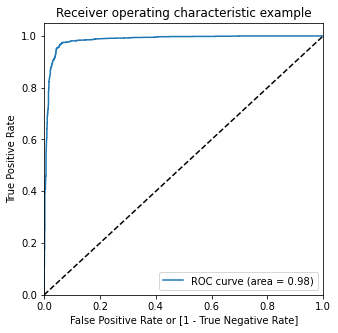

In [146]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity



In [147]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.993880,4584,1,1,1,1,1,1,1,1,1,1,1
1,1,0.930065,5617,1,1,1,1,1,1,1,1,1,1,1
2,0,0.010197,1095,0,1,0,0,0,0,0,0,0,0,0
3,1,0.962314,3166,1,1,1,1,1,1,1,1,1,1,1
4,1,0.962134,401,1,1,1,1,1,1,1,1,1,1,1


In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.551034  1.000000  0.000000
0.1   0.1  0.923531  0.985110  0.847953
0.2   0.2  0.946177  0.976772  0.908626
0.3   0.3  0.956351  0.974390  0.934211
0.4   0.4  0.955038  0.969029  0.937865
0.5   0.5  0.954381  0.961882  0.945175
0.6   0.6  0.953069  0.953544  0.952485
0.7   0.7  0.952084  0.948183  0.956871
0.8   0.8  0.949458  0.942823  0.957602
0.9   0.9  0.919921  0.873734  0.976608


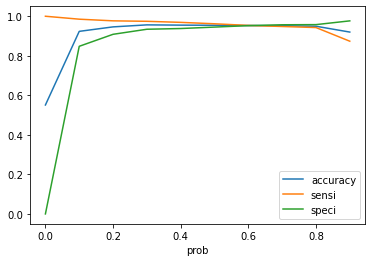

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [150]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.993880,4584,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.930065,5617,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.010197,1095,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.962314,3166,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.962134,401,1,1,1,1,1,1,1,1,1,1,1,1


In [151]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.993880,4584,1,1,1,1,1,1,1,1,1,1,1,1,99
1,1,0.930065,5617,1,1,1,1,1,1,1,1,1,1,1,1,93
2,0,0.010197,1095,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.962314,3166,1,1,1,1,1,1,1,1,1,1,1,1,96
4,1,0.962134,401,1,1,1,1,1,1,1,1,1,1,1,1,96


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9767718880285885

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.908625730994152

In [155]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09137426900584796


In [156]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9291784702549575


In [157]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9695787831513261


In [158]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1293,   75],
       [  64, 1615]], dtype=int64)

In [159]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9556213017751479

In [160]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.961882072662299

In [161]:
from sklearn.metrics import precision_score, recall_score

In [162]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9556213017751479

In [163]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.961882072662299

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       1
 4       1
        ..
 3042    1
 3043    1
 3044    1
 3045    1
 3046    1
 Name: Converted, Length: 3047, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 3042    1
 3043    1
 3044    1
 3045    1
 3046    1
 Name: predicted, Length: 3047, dtype: int64)

In [166]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

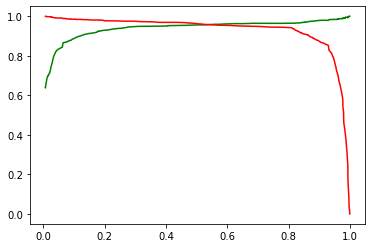

In [167]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [168]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4584,0,0,0.888005,0.612028,0.290907,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5617,0,0,-1.272851,-1.029308,-1.425005,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1095,0,0,-0.552566,-0.101970,-0.281063,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3166,0,0,-0.192423,-0.523487,0.290907,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
401,0,0,0.527863,0.866659,1.434849,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [169]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Had a Phone Conversation
4123,0,2.135864,1,0,0,0,1,0,0,0,0,0,0
4216,0,-1.022917,1,0,0,0,1,0,0,0,0,0,0
8905,0,-1.022917,0,1,0,0,0,0,0,0,0,1,0
7971,1,-0.583616,0,0,1,0,0,0,1,0,0,0,0
964,0,1.663442,0,0,0,0,0,0,0,1,0,0,0


In [170]:
X_test_sm = sm.add_constant(X_test)

In [171]:
y_test_pred = res.predict(X_test_sm)

In [172]:
y_test_pred[:10]

4123    0.999848
4216    0.997147
8905    0.005061
7971    0.014415
964     0.981589
6842    0.997897
5991    0.951654
1447    0.986609
2456    0.001475
2629    0.977351
dtype: float64

In [177]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [178]:
# Let's see the head
y_pred_1.head()

,0
4123,0.999848
4216,0.997147
8905,0.005061
7971,0.014415
964,0.981589


In [179]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [180]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [181]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [182]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [183]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4123,0.999848
1,1,4216,0.997147
2,0,8905,0.005061
3,0,7971,0.014415
4,1,964,0.981589


In [184]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [186]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4123,0.999848
1,1,4216,0.997147
2,0,8905,0.005061
3,0,7971,0.014415
4,1,964,0.981589


In [187]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [188]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,1,4123,0.999848,1
1,1,4216,0.997147,1
2,0,8905,0.005061,0
3,0,7971,0.014415,0
4,1,964,0.981589,1


In [189]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9502677888293802

In [190]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[495,  50],
       [ 15, 747]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9803149606299213

In [193]:
# Let us calculate specificity
TN / float(TN+FP)

0.908256880733945